# DL-Tabular

For this purpose, we will use the heart disease UCI data
# https://medium.com/analytics-vidhya/machine-mearning-model-interpretability-with-python-1ad8e6a464d1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import shap


In [2]:
data = pd.read_csv("C:/Users/joaof/Downloads/processed.cleveland.data",header=None)

In [3]:
headers=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
data.columns=headers

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Since we want to create a simple classification problem, we will transform the variable num into a dual category, presence (1,2,3,4) or absence disease (0)

In [5]:
data['target'] = data['num'].apply(lambda x: 1 if x>=1 else 0)

In [6]:
data.drop(columns=['num'],inplace=True)

In [7]:
data.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


<AxesSubplot:xlabel='target', ylabel='count'>

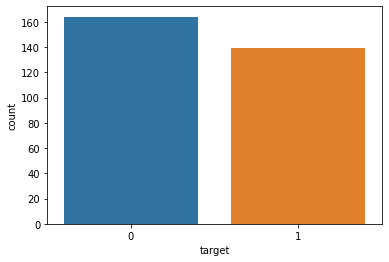

In [9]:
sns.countplot(x = 'target', data=data)

<AxesSubplot:xlabel='ca', ylabel='count'>

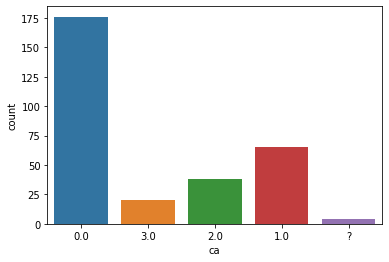

In [10]:
sns.countplot(x = 'ca', data=data)

<AxesSubplot:xlabel='thal', ylabel='count'>

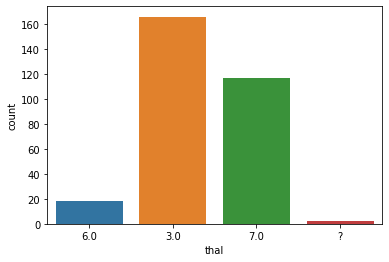

In [11]:
sns.countplot(x = 'thal', data=data)

since they are so low, lets remove the "?"

In [12]:
data.drop(data[data["thal"]=="?"].index,inplace=True)
data.drop(data[data["ca"]=="?"].index,inplace=True)
data.reset_index(inplace=True,drop=True)

In [13]:
y=data.iloc[:,-1]
X=data.iloc[:,0:-1]

In [14]:
ca_dummies = pd.get_dummies(X.ca,prefix="ca")
X=pd.concat([X, ca_dummies], axis=1)
thal_dummies = pd.get_dummies(X.thal,prefix="thal")
X=pd.concat([X, thal_dummies], axis=1)

In [15]:
X.drop(columns=["ca","thal"],inplace=True)

In [16]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [40]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


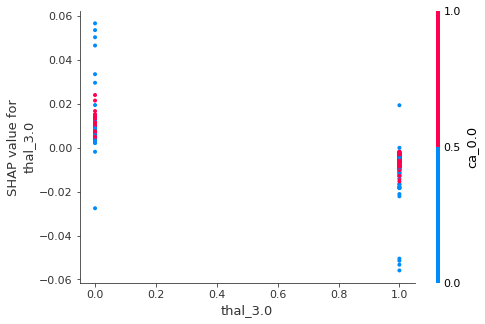

In [41]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("thal_3.0", shap_values, X_train)

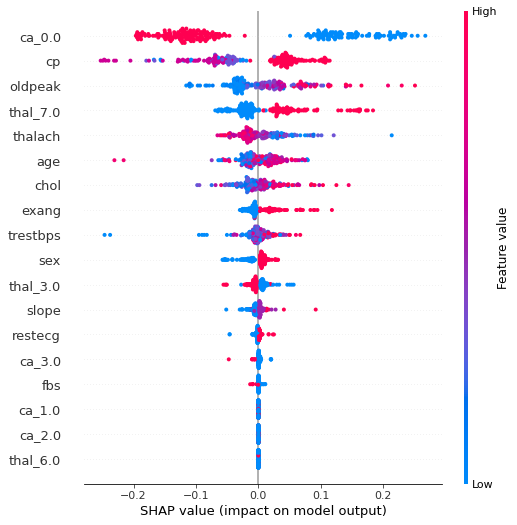

In [42]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

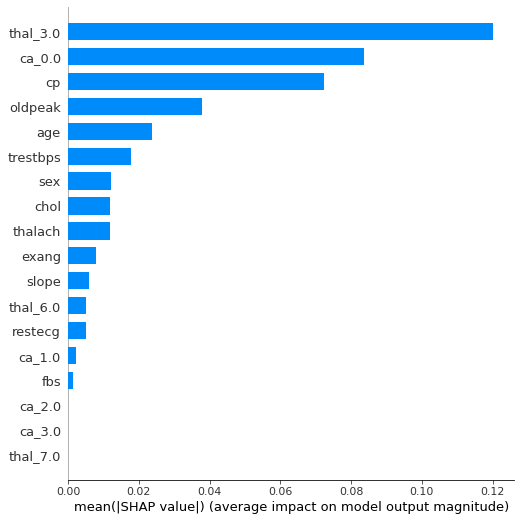

In [24]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [44]:
dtest=xgboost.DMatrix(X_test, label=y_test)
preds = model.predict(dtest)

In [47]:
y_preds=[0 if pred<0.5 else 1 for pred in preds]

In [50]:

confusion_matrix(y_test, y_preds)


array([[29,  7],
       [ 4, 20]], dtype=int64)

In [52]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,preds)


0.8935185185185185